In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df= pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [133]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
cat_col= df.select_dtypes(include="object")
cat_col.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [136]:
num_col=df.select_dtypes(exclude="object")
num_col.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [137]:
num_col.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0               1
-124.30    41.80     19.0                2672.0       552.0           1298.0      478.0       1.9797         85800.0               1
           41.84     17.0                2677.0       531.0           1244.0      456.0       3.0313         103600.0              1
-124.27    40.69     36.0                2349.0       528.0           1194.0      465.0       2.5179         79000.0               1
-124.26    40.58     52.0                2217.0       394.0           907.0       369.0       2.3571         111400.0              1
                                                                                                                                  ..
-114.56    33.69     17.0                720.0        174.0           333.

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
#x and y
x=df.drop(["median_house_value"],axis=1)
y=df["median_house_value"]

In [140]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [141]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
train_data = pd.concat([x_train,y_train])
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,NEAR OCEAN
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,<1H OCEAN
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,INLAND
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,INLAND


In [143]:
final_df =pd.concat([cat_col,num_col],axis=1)
final_df

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NEAR BAY,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,NEAR BAY,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,NEAR BAY,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,NEAR BAY,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,NEAR BAY,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,INLAND,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,INLAND,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,INLAND,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,INLAND,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

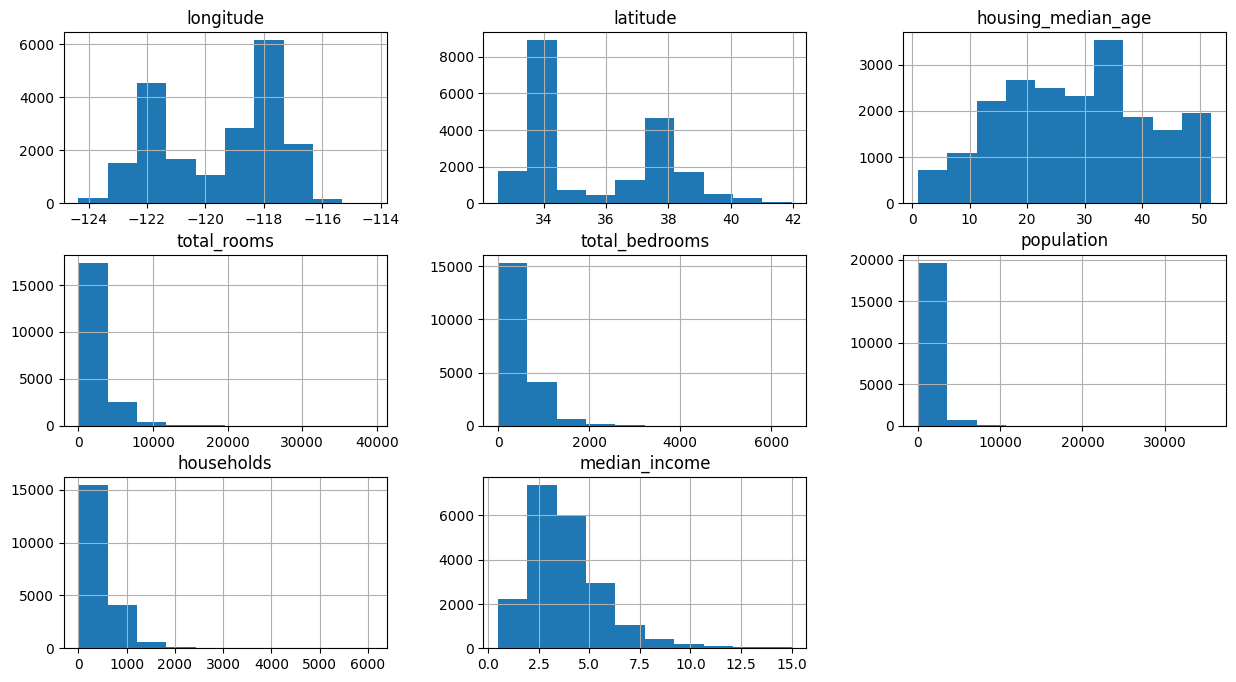

In [144]:
train_data.hist(figsize=(15,8))

<Axes: >

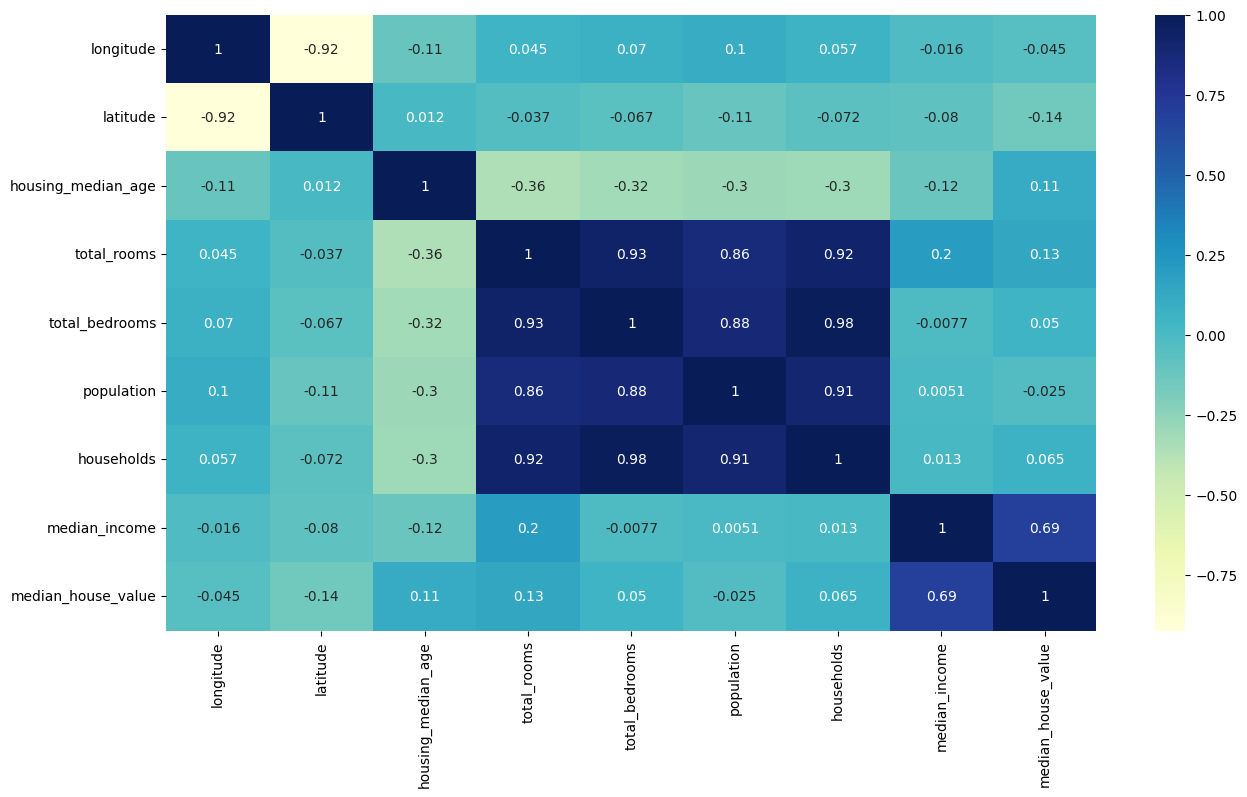

In [145]:
plt.figure(figsize=(15,8))
sns.heatmap(num_col.corr(), annot=True,cmap="YlGnBu")
#num_col.corr()

In [146]:
cat_col["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [147]:
df2= pd.get_dummies(cat_col).astype(int)
df2

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [155]:
df3=pd.concat([train_data,df2],axis=1)#.drop("ocean_proximity",axis=1,inplace=True)
df3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,1,0,0,0,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,0,1,0,0,0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,0,1,0,0,0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,1,0,0,0,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,NEAR OCEAN,0,0,0,0,1
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,<1H OCEAN,1,0,0,0,0
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,INLAND,0,1,0,0,0
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,INLAND,0,1,0,0,0


In [156]:
df3.drop("ocean_proximity",axis=1,inplace=True)
df3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,1,0,0,0,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,0,1,0,0,0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,0,1,0,0,0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,1,0,0,0,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,0,0,0,0,1
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,1,0,0,0,0
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,0,1,0,0,0
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,0,1,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

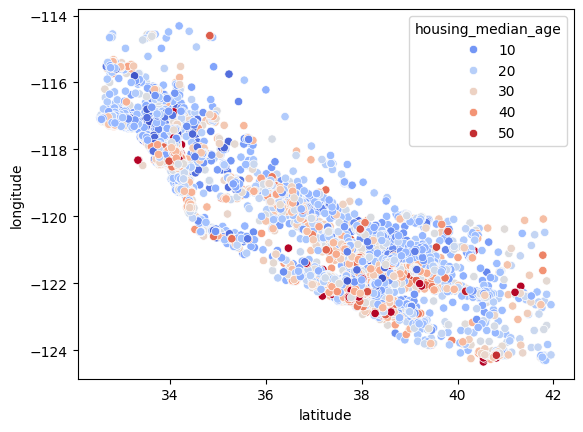

In [163]:
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="housing_median_age",palette="coolwarm")